In [7]:
import itertools
import random
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import itertools as it
%matplotlib inline
import networkx as nx
from collections import Counter

In [3]:
# Run this only in Colab environment
# from google.colab import drive
# drive.mount('/content/gdrive')
# path = '/content/gdrive/My Drive/<your_gdrivefolder>/data/'
###############################################################
# for local storage
path = '../data/'

# real-world data and friendship paradox

## Exercise (12pts)

Compare three real-world datasets:

`protein.edgelist.txt`

`collaboration.edgelist.txt`

`powergrid.edgelist.txt`

1. Plot the cumulative degree distribution for each network
2. Can you tell whether it is power-law or exponentially distributed?
3. Estimate the exponent or the decay parameter in the exponential case, respectively.
   (a rough approximation is enough, no optimized fitting needed)

4. Write a function to compute the average next-nearest-neighbor degree
5. Identify the friendship paradox
6. Compare with the analytical result from the paper exercise 

In [19]:
# read graphs
G1 = nx.read_edgelist(path + "protein.edgelist.txt")
G2 = nx.read_edgelist(path + "collaboration.edgelist.txt")
G3 = nx.read_edgelist(path + "powergrid.edgelist.txt")

Gs = [G1, G2, G3]
names = ["Protein Graph", "Collaboration Graph", "Powergrid Graph"]

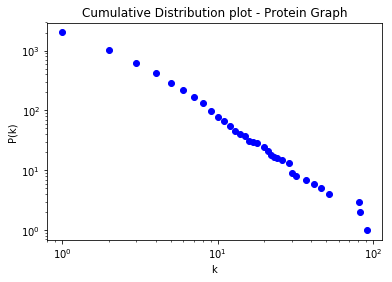

Power law distribution
Average number of friends of friends 11.111262798634812
Percentage of nodes that have have fewer friends than their friends have: 0.7492566897918731


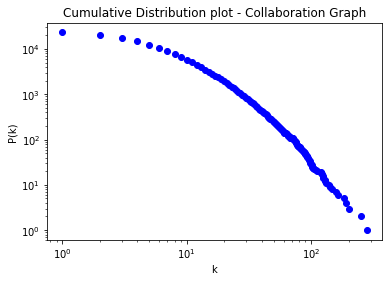

Exponential distribution
Average number of friends of friends 22.058123481629725
Percentage of nodes that have have fewer friends than their friends have: 0.8279514114036225


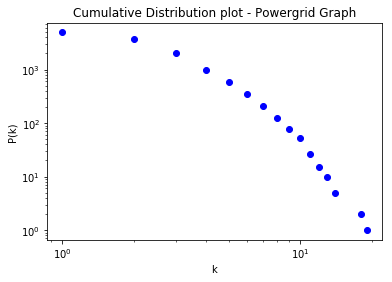

Exponential distribution
Average number of friends of friends 3.8712465878070974
Percentage of nodes that have have fewer friends than their friends have: 0.6767860756931795


In [57]:
# function that computes the average next-nearest-neighbor degree
def average_nn(G):
    ki = [val for (node, val) in G.degree()]
    ki2 = [val ** 2 for (node, val) in G.degree()]
    return sum(ki2)/sum(ki)


# function that identifies friendship paradox
def friendship_paradox_percentage(G):
    friends_friends_avg = dict()
    for node in G.nodes():
        fr = 0
        for n in G.neighbors(node):
            fr += len(list(G.neighbors(n)))
        friends_friends_avg[node] = fr / len(list(G.neighbors(node)))

    #average_friend_of_friends = sum(friends_friends_avg.values()) / len(friends_friends_avg)

    # count how many nodes have the friendship paradox
    fi = 0
    for node in G.nodes():
        if friends_friends_avg[node] > len(list(G.neighbors(node))):
            fi+=1
            
    return fi / G.number_of_nodes()



i = 0
for G in Gs:

    # plot cumulative degree distribution 
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    degreeCount = Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    cs = np.cumsum(cnt)
    plt.loglog(deg, cs, 'bo')
    plt.title("Cumulative Distribution plot - " + names[i])
    plt.ylabel("P(k)")
    plt.xlabel("k")
    plt.show()
    i+=1
    
    if i == 1:
        print('Power law distribution')
    else:
        print('Exponential distribution')
        
    knn = average_nn(G)
    print('Average number of friends of friends', knn)
    
    print('Percentage of nodes that have have fewer friends than their friends have:',
         friendship_paradox_percentage(G))
    
